In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import os
from operator import itemgetter

In [62]:
def list_dirs(path):
    for item in os.listdir(path):
        item_path = os.path.join(path, item)
        if os.path.isdir(item_path):
            yield item_path


def get_all(cell, root='../mrnn/ptb_gridsearch/'):
    cell_dir = os.path.join(root, cell)
    lrs = [lr for lr in list_dirs(cell_dir)]
    ranks = [rank
             for lr_dir in lrs 
             for rank in list_dirs(lr_dir)]
    
    all_results = []
    for run in ranks:
        test_error_file = os.path.join(run, 'test.txt')
        if os.path.exists(test_error_file):
            with open(test_error_file, 'r') as fp:
                results = fp.read()
            xent = float(results.split()[-1]) 
            all_results.append((xent, run))
        else:
            print('{} missing test file'.format(run))
    return all_results
            

def get_best(cell, root='../mrnn/ptb_gridsearch/'):
    return min(get_all(cell, root), key=itemgetter(0))

def print_results(xent, run, width=90):
    splits = run.split(os.sep)
    cell, lr, rank = splits[-3:]
    left = '{:<{}}'.format('{}, {}, {}: '.format(cell, lr, rank), width//2)
    right = '{:>{}}'.format('xent: {} (perp: {})'.format(xent, np.exp(xent)), width//2)
    print(left + right)

In [63]:
for cell in ['cp-gate', 'cp-gate-combined', 'cp-gate-linear', 'cp-gate-combined-linear', 'gru', 'lstm', 'vanilla']:
    print_results(*get_best(cell))

cp-gate, lr-0.01, rank-64:                   xent: 4.885653404962449 (perp: 132.37693282689688)
cp-gate-combined, lr-0.01, rank-64:          xent: 4.955027512141636 (perp: 141.8865099210179)
cp-gate-linear, lr-0.01, rank-64:            xent: 4.822537808191209 (perp: 124.28008993728801)
cp-gate-combined-linear, lr-0.01, rank-32:   xent: 4.867019812266032 (perp: 129.93311424781592)
gru, lr-0.001, rank-1:                       xent: 4.983666510809035 (perp: 146.0087440705367)
lstm, lr-0.01, rank-1:                       xent: 4.922782648177374 (perp: 137.38437416525827)
vanilla, lr-0.001, rank-1:                   xent: 5.068119934626988 (perp: 158.87535033840834)


In [64]:
for cell in ['cp-gate', 'cp-gate-combined', 'cp-gate-linear', 'cp-gate-combined-linear', 'gru', 'lstm', 'vanilla']:
    print('~'*30)
    for xent, run in get_all(cell):
        print_results(xent, run)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cp-gate, lr-0.001, rank-1:                   xent: 5.109675021398635 (perp: 165.61652430088108)
cp-gate, lr-0.001, rank-128:                 xent: 5.045906066894531 (perp: 155.38502466214297)
cp-gate, lr-0.001, rank-256:                 xent: 5.051006158192952 (perp: 156.17952676882348)
cp-gate, lr-0.001, rank-32:                  xent: 5.015638669331868 (perp: 150.75238695287655)
cp-gate, lr-0.001, rank-64:                  xent: 5.022647653307233 (perp: 151.81271960374767)
cp-gate, lr-0.001, rank-8:                   xent: 5.027349630991618 (perp: 152.5282204397864)
cp-gate, lr-0.01, rank-1:                    xent: 4.9249699002220515 (perp: 137.6851972866217)
cp-gate, lr-0.01, rank-128:                  xent: 4.903404939742315 (perp: 134.7478076290299)
cp-gate, lr-0.01, rank-256:                  xent: 4.944313299088251 (perp: 140.37442250259917)
cp-gate, lr-0.01, rank-32:                   xent: 4.889160928272066 (perp: 132.84206325548897)
cp-gate, lr

In [82]:
def results_by_rank(cell):
    """Get the best results per rank"""
    results = {}
    for xent, run in get_all(cell):
        _, _, rank = run.split(os.sep)[-3:]
        rank = int(rank.split('-')[-1])
        if rank not in results or xent < results[rank]:
            results[rank] = xent
    results = [(a, b) for a, b in results.items()]
    return results

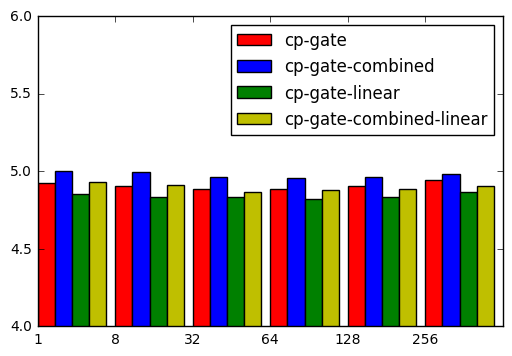

In [91]:
axes = plt.subplot(111)
width = 1/4.5

colours = ['r', 'b', 'g', 'y']
cells = ['cp-gate', 'cp-gate-combined', 'cp-gate-linear', 'cp-gate-combined-linear']
rects = [[], []]
for i, cell in enumerate(cells):
    data = results_by_rank(cell)
    data = sorted(data)
    ixes = np.arange(len(data))
    rect = plt.bar(ixes + (i*width), [item[1] for item in data], width, color=colours[i])
    rects[0].append(rect[0])
    rects[1].append(cell)
    
axes.set_xticklabels([item[0] for item in data])
plt.ylim(4, 6)
plt.legend(*rects)